## 1. Import Libraries

In [111]:
# Imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

## 2. Reading Dataset and Understanding Data

### 2.1. Reading Dataset

In [112]:
# Read the csv file using pandas
Bike_Sharing = pd.read_csv('day.csv')

In [113]:
# Inspect first few rows
Bike_Sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 2.2. Understanding Data

In [114]:
# Check the Shape of Data
Bike_Sharing.shape

(730, 16)

In [115]:
# Check dataframe for null and datatype
Bike_Sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [116]:
# Check the details of numerical data
Bike_Sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [117]:
# Check the datatypes of data
Bike_Sharing.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [118]:
# Check the columns of data
Bike_Sharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [119]:
# Check the size of data
Bike_Sharing.size

11680

In [120]:
# Check the dimension of data
Bike_Sharing.ndim

2

In [121]:
# Check the values of data
Bike_Sharing.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

## 3. Data Cleaning

### 3.1. Drop columns that are not useful for analysis

In [122]:
# Droping instant column as it is index column which has nothing to do with target
Bike_Sharing.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
Bike_Sharing.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

Bike_Sharing.drop(['casual'], axis = 1, inplace = True)
Bike_Sharing.drop(['registered'], axis = 1, inplace = True)

In [123]:
# Inspect data frame after dropping
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 3.2. Count Values for Numerical Variables

In [124]:
# Count Types of Values for season
Bike_Sharing.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [125]:
# Count Types of Values for yr
Bike_Sharing.yr.value_counts()

1    365
0    365
Name: yr, dtype: int64

In [126]:
# Count Types of Values for mnth
Bike_Sharing.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [127]:
# Count Types of Values for weathersit
Bike_Sharing.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [128]:
# Count Types of Values for weekday
Bike_Sharing.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [129]:
# Count Types of Values for holiday
Bike_Sharing.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [130]:
# Count Types of Values for workingday
Bike_Sharing.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

### 3.3. Handle Missing values

In [131]:
# Checking null values in data
Bike_Sharing.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

#### Inference: There are no null values.

### 3.4. Handling Outliers

In [132]:
# Print number of unique values in all columns
Bike_Sharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

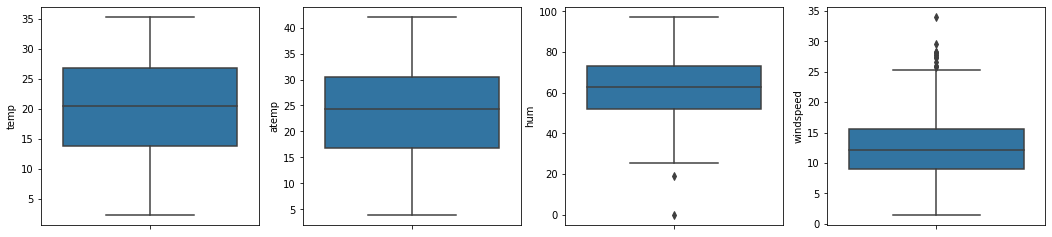

In [133]:
# Plot the box plot to check the outliers in the dataset
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=Bike_Sharing)
    i+=1

#### Inference: 
From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## 4. EDA

### 4.1. Convert season,mnth,weekday and weathersit to categorical types

In [134]:
# Convert the season into categorical types
Bike_Sharing.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)

# Convert the weathersit into categorical types
Bike_Sharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace=True)

# Convert the mnth into categorical types
Bike_Sharing.mnth = Bike_Sharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

# Convert the weekday into categorical types
Bike_Sharing.weekday = Bike_Sharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})


In [135]:
# Inspect the dataset 
Bike_Sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


### 4.2. Visualisation of numerical variables in dataset

<Figure size 1440x1080 with 0 Axes>

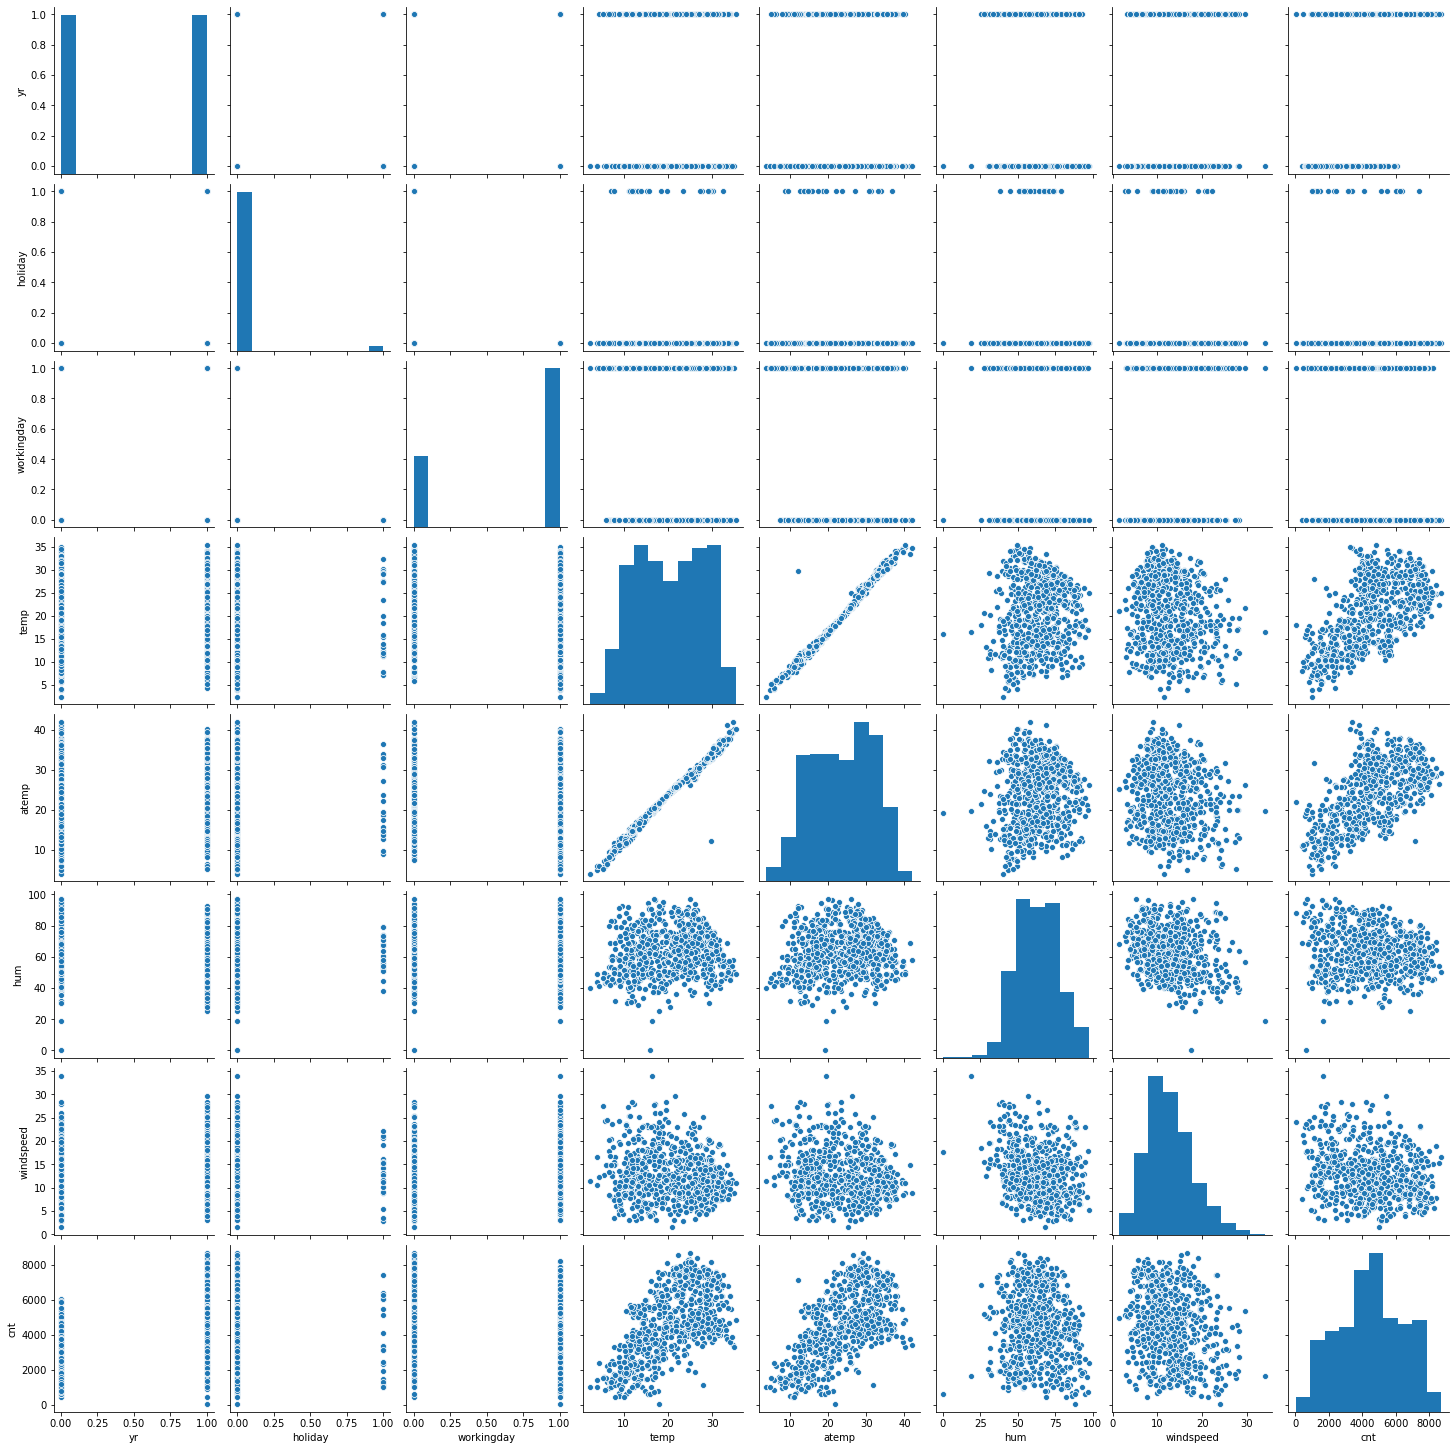

In [136]:
# Plot the pair plot to check the corelation between variable
plt.figure(figsize=(20,15))
sns.pairplot(Bike_Sharing)
plt.show()

### 4.3. Visualisation of categorical variables in dataset

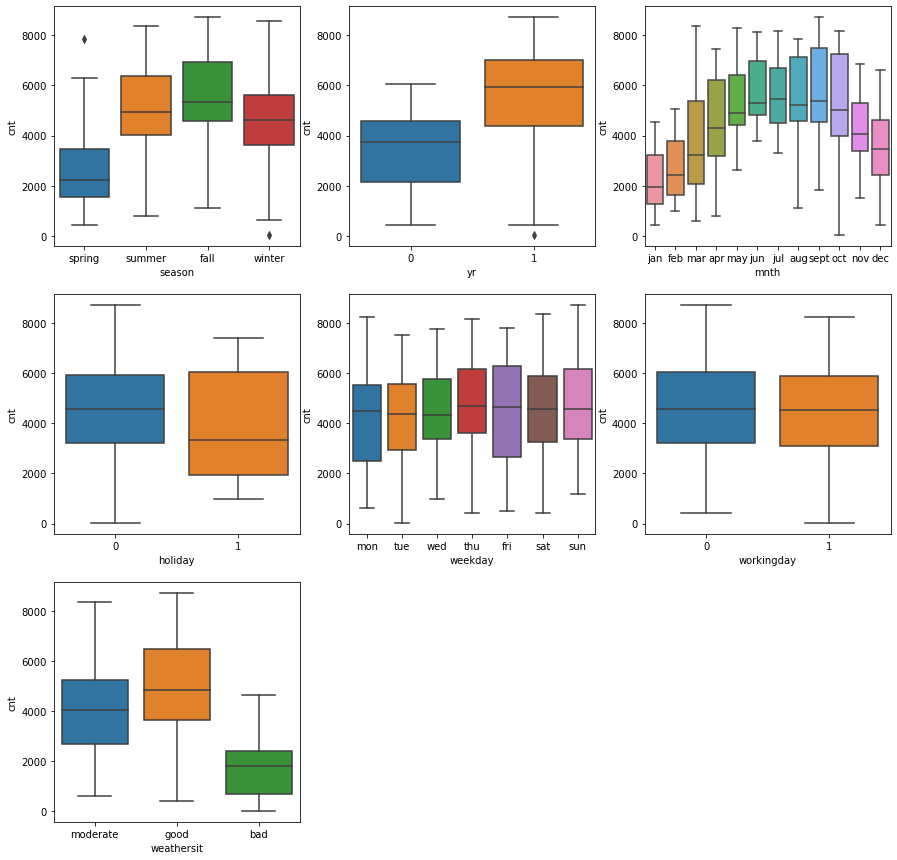

In [137]:
catg_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(catg_var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=Bike_Sharing, x=i[1], y='cnt')
plt.show()

#### Inference:
Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes
2. The demand of bike for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. When there is a working the demand has increased
6. Weekday is not giving clear picture abount demand.
7. The clear weathershit has highest demand
8. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

### 4.4. Univariate analysis on categorical columns

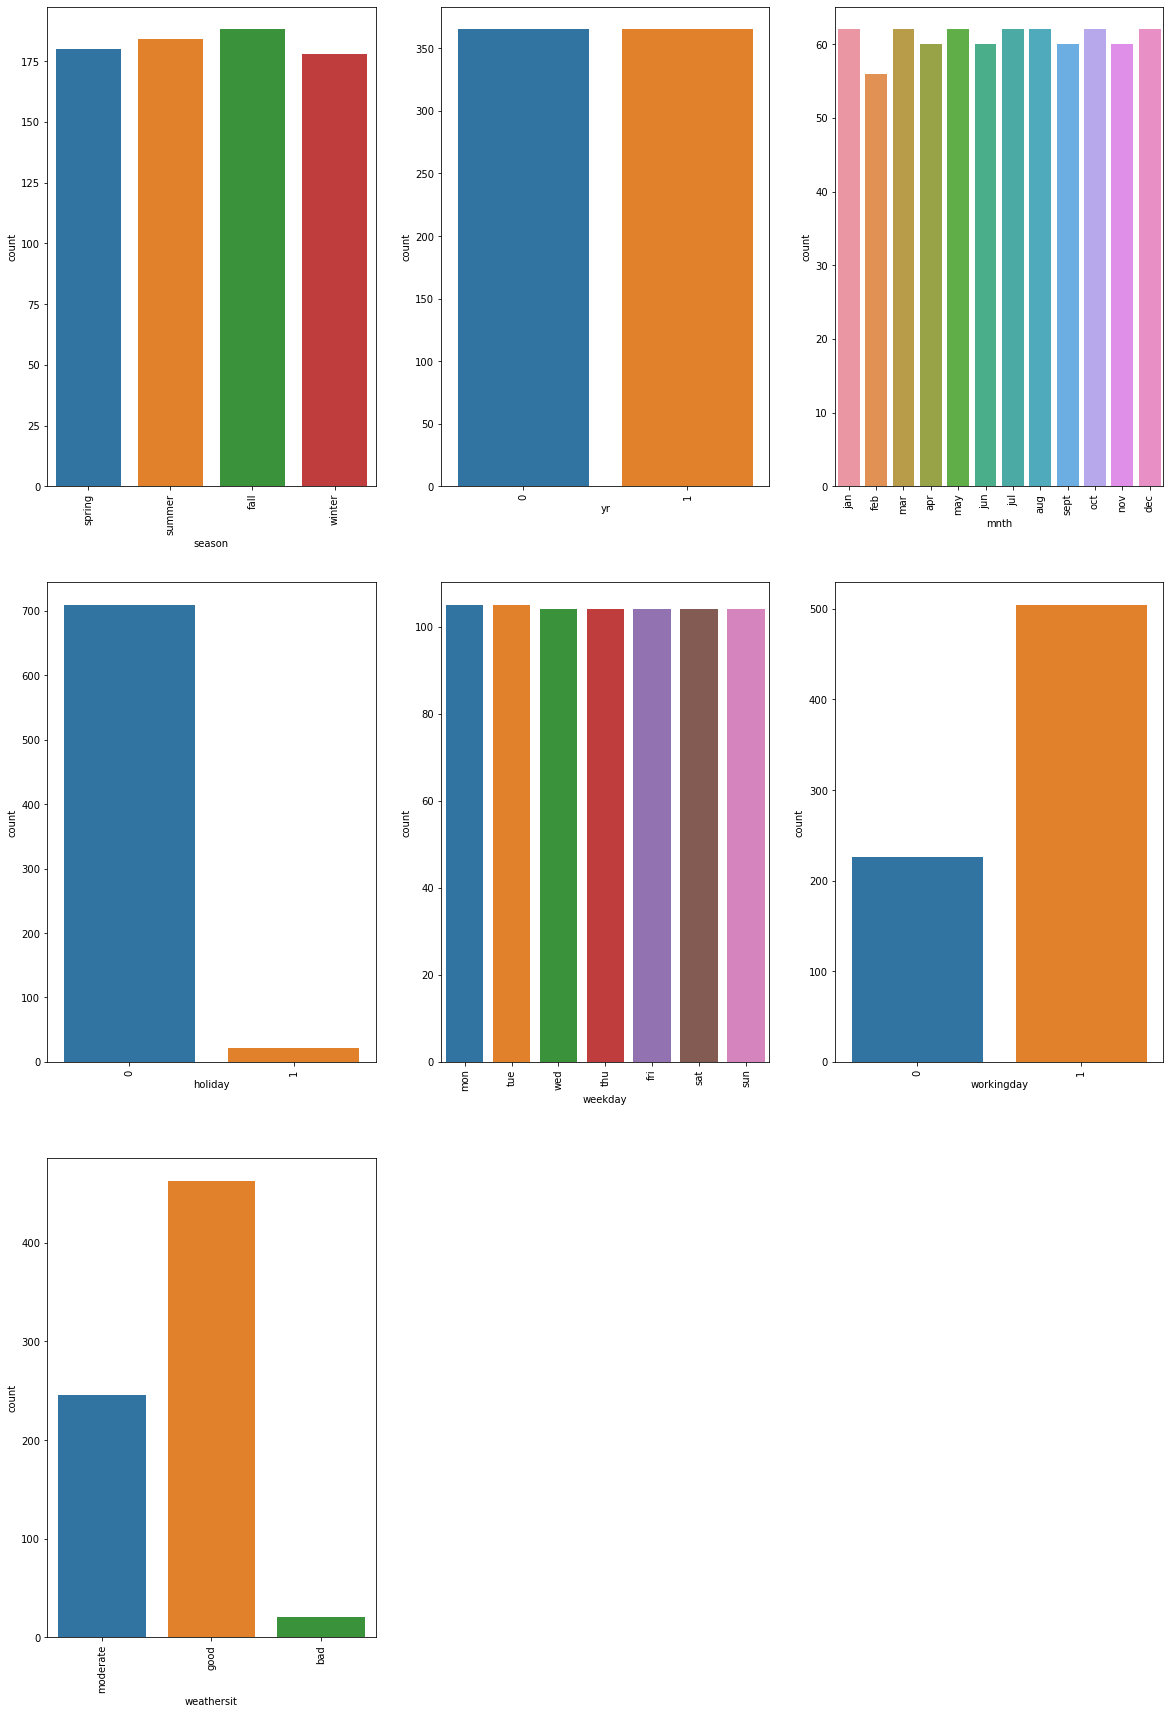

In [167]:
# Plotting count plot for categorical columns
catg_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize = (20,30))
i = 1
for col in catg_var:
    plt.subplot(3,3,i)
    sns.countplot(x = col , data = Bike_Sharing)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

#### Inference:
Here many insights can be drawn from the plots

1. Season: 3:fall has highest count of bikes rented and Season 4: Winter has the lowest count of bikes rented
2. The count of bikes rented is same for both year
3. The count of bikes rented is more in Jan,Mar,May,Jul,Aug,Oct,Dec as compared to other month
4. When there is a holiday the count of bikes are rented is minimum.
5. During the weekdays there count of bikes rented is almost same
6. During working days the count of bikes rented is maximum.
7. The count of bikes rented when the good is more compared to other weather


### 4.5. Univariate analysis on numerical columns

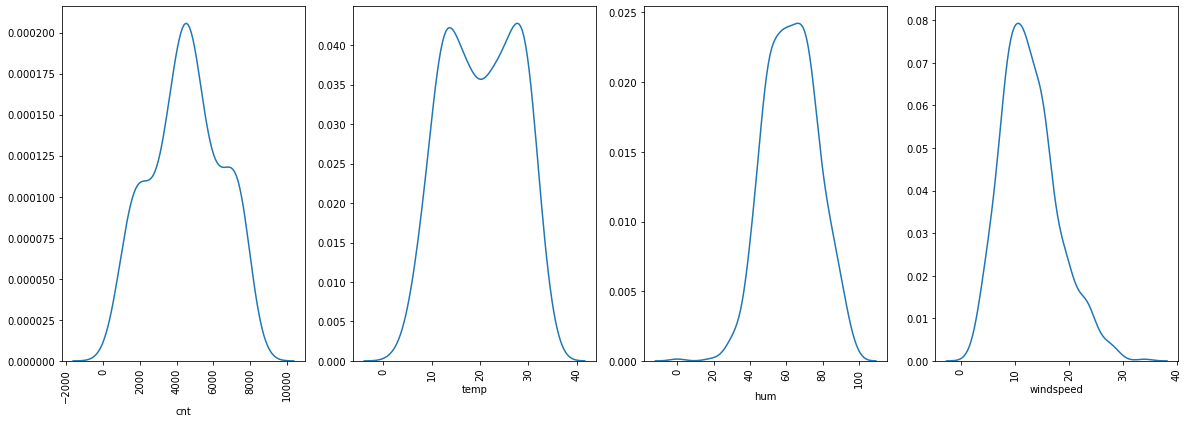

In [139]:
# Plotting dist plot for numerical columns
num_var = ['cnt', 'temp', 'hum','windspeed']
plt.figure(figsize = (20,30))
i = 1
for col in contu_var:
    plt.subplot(4,4,i)
    sns.distplot(Bike_Sharing[col],hist=False)
    plt.xticks(rotation = 90)
    i += 1
plt.show()

#### Inference:
1. The average number bikes rented in a year in 4000
1. The number of bike rented is more when the temp is 10 and 30
2. The number of bike rented is more when the hum is 80
3. The number of bike rented is more when the windspeed is 10

### 4.6. Bivariate analysis on categorical columns

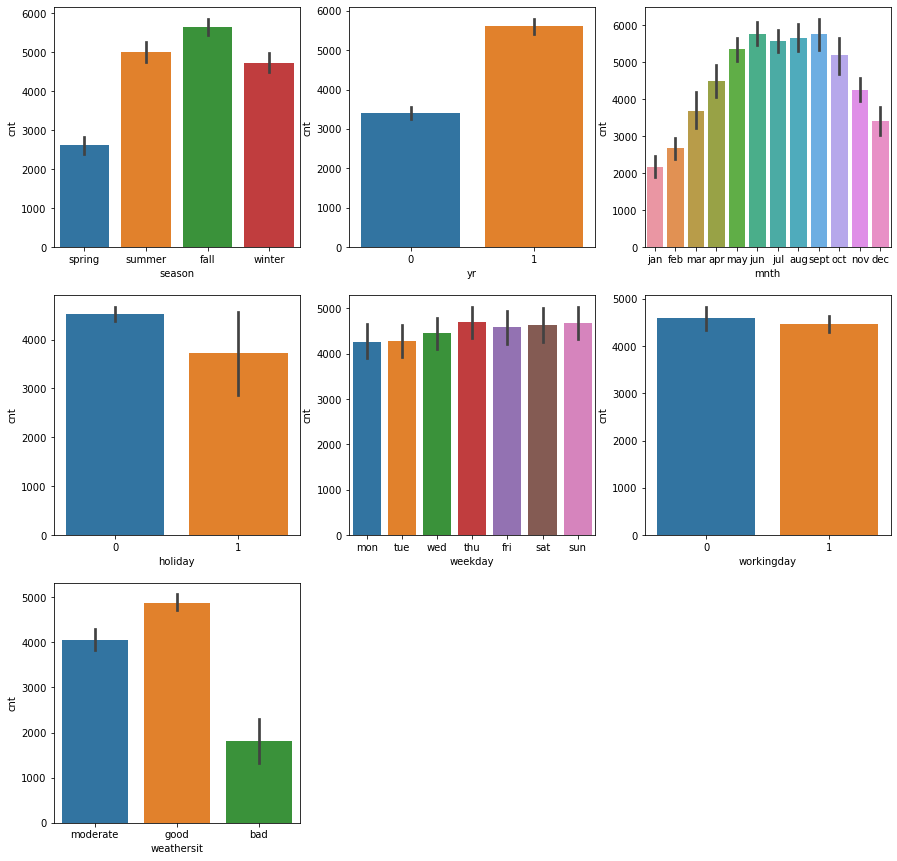

In [170]:
# Plotting box plot for categorical columns
catg_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(catg_var):
    plt.subplot(3,3,i[0]+1)
    sns.barplot(data=Bike_Sharing, x=i[1], y='cnt')
plt.show()

#### Inference:
Here many insights can be drawn from the plots

1. Season: 3:fall has highest demand for rental bikes.
2. The demand for bike for next year has grown.
3. The demand of bike is continuously growing each month till June. September month has highest demand. After September, demand    is decreasing.
4. When there is a holiday, demand has decreased.
5. When there is a working the demand has increased.
6. Weekday is not giving clear picture about demand.
7. The clear weathershit has highest demand.
8. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

### 4.7 Bivariate analysis on numerical columns

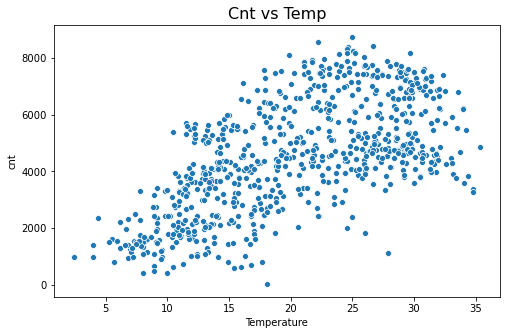

In [148]:
# Plotting scatter plot for cnt vs temp
plt.figure(figsize = (8,5))
plt.title("Cnt vs Temp",fontsize=16)
sns.scatterplot(data=Bike_Sharing,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Inference:
1. Demand for bikes is positively correlated to temp.
2. We can see that cnt is linearly increasing with temp indicating linear relation.

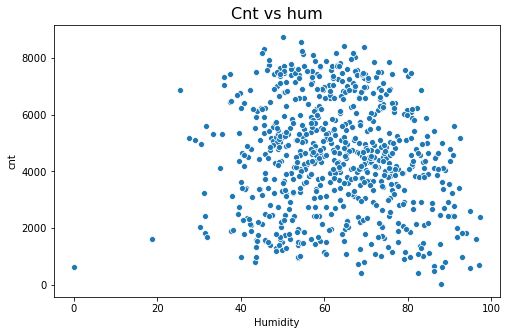

In [147]:
# Plotting scatter plot for cnt vs hum
plt.figure(figsize = (8,5))
plt.title("Cnt vs hum",fontsize=16)
sns.scatterplot(data=Bike_Sharing,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Inference:
1. Hum is values are more scattered around.
2. Although we can see cnt decreasing with increase in humidity.

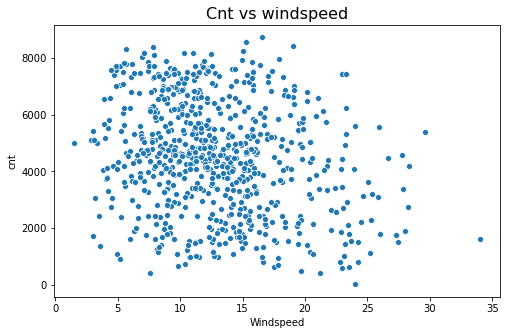

In [146]:
# Plotting scatter plot for cnt vs windspeed
plt.figure(figsize = (8,5))
plt.title("Cnt vs windspeed",fontsize=16)
sns.scatterplot(data=Bike_Sharing,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.show()

#### Inference:
1. Windspeed is values are more scattered around.
2. Although we can see cnt decreasing with increase in windspeed.

### 4.8. Draw Heatmap of correlation between variables

In [33]:
# Calculate Correlation between varibles
corr = Bike_Sharing.corr()
corr

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


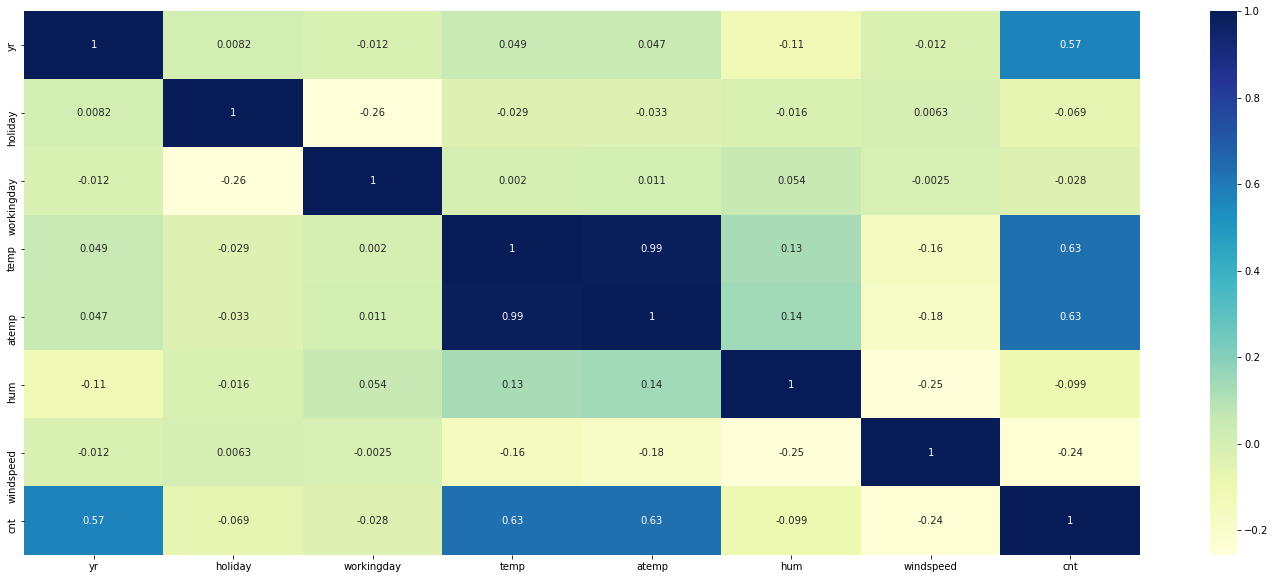

In [34]:
# Draw Heatmap of correlation
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### Inference: 
The variable temp, atemp seems to be highly correlated 
Temp and Atemp also have high correlation with cnt variable.

In [35]:
Bike_Sharing.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


#### 4.9 Creating Dummy Variables

In [36]:
# Creating dummy variables for furnishing status
Bike_Sharing = pd.get_dummies(data=Bike_Sharing,columns=["season","mnth","weekday"],drop_first=True)
Bike_Sharing = pd.get_dummies(data=Bike_Sharing,columns=["weathersit"])

In [37]:
# Print columns after creating dummies
Bike_Sharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [38]:
# Print few rows to inspect
Bike_Sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


## 5. Model Building

### 5.1. Spliting data into the train and test

In [39]:
# Checking the shape of data before splitting
Bike_Sharing.shape

(730, 31)

In [40]:
#Train Test split with 70:30 ratio
df_train, df_test = train_test_split(Bike_Sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
# Checking shape and size for train and test
print(df_train.shape)
print(df_test.shape)

(510, 31)
(219, 31)


### 5.2. Feature Scaling continuous variables

In [42]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [43]:
#Use Normalized scaler to scale
scaler = MinMaxScaler()

# Create list of numeric variables
num_vars = ['temp','atemp','hum','windspeed']

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [44]:
# Inspecting dataset
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,0,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,1,0,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


### 5.3. Dividing into X and Y sets for the model building

In [45]:
#y to contain only target variable
y_train=df_train.pop('cnt')

#X is all remaining variable also our independent variables
X_train=df_train

### 5.4. Build a Model using RFE and Automated approach

In [46]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [47]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [48]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 10),
 ('weekday_sat', False, 5),
 ('weekday_sun', False, 6),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

### 5.4. Build a Model using Manual elimination

In [49]:

#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    
# Add a constant
    X_train_sm = sm.add_constant(X_train[cols]) 

# Create a first fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [50]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [51]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sept', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [52]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [53]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [54]:
X_train_rfe.shape

(510, 15)

## 6. Build Model


### 6.1. Model 1 - Start with all variables selected by RFE

In [55]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          9.28e-189
Time:                        12:52:36   Log-Likelihood:                -4112.1
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2725.7022    

#### Model 2

In [56]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.73e-189
Time:                        12:52:38   Log-Likelihood:                -4113.9
No. Observations:                 510   AIC:                             8258.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2628.4231    

### Model 3.

In [57]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.94e-186
Time:                        12:52:38   Log-Likelihood:                -4123.6
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     496   BIC:                             8334.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1939.2498    

### Model 4.

In [58]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     204.8
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.45e-183
Time:                        12:52:38   Log-Likelihood:                -4132.8
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1788.7153    

### Model 5.

In [59]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     219.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          3.66e-183
Time:                        12:52:39   Log-Likelihood:                -4136.5
No. Observations:                 510   AIC:                             8297.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1710.3258    

### Model 6.

In [60]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          2.33e-147
Time:                        12:52:39   Log-Likelihood:                -4224.0
No. Observations:                 510   AIC:                             8470.
Df Residuals:                     499   BIC:                             8516.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5078.7474    

### Model 7.

In [61]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     76.67
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           3.18e-94
Time:                        12:52:40   Log-Likelihood:                -4349.9
No. Observations:                 510   AIC:                             8722.
Df Residuals:                     499   BIC:                             8768.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3665.6686    

### Model 8.

In [62]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     145.0
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.14e-140
Time:                        12:52:40   Log-Likelihood:                -4239.8
No. Observations:                 510   AIC:                             8502.
Df Residuals:                     499   BIC:                             8548.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4696.8396    

### Model 9.

In [63]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     144.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.31e-140
Time:                        12:52:41   Log-Likelihood:                -4239.9
No. Observations:                 510   AIC:                             8502.
Df Residuals:                     499   BIC:                             8548.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4711.5359    

### Model 10.

In [64]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     250.6
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          5.27e-179
Time:                        12:52:42   Log-Likelihood:                -4152.0
No. Observations:                 510   AIC:                             8324.
Df Residuals:                     500   BIC:                             8366.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1663.9669    

### Model 11.

In [65]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.6
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.21e-179
Time:                        12:52:42   Log-Likelihood:                -4153.4
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     501   BIC:                             8363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1686.3236    

#### Inference: 

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.819 Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.
****

### 6.2. Final Model

In [66]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [67]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul','season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1686.3236353557709 [ 2028.99519007  -987.17355903  -589.10488056   460.09911301
   539.64800683 -2573.9298889   -676.26522172  4103.23475256]


##  7. Model Evaluation

### 7.1. Residual Analysis

In [68]:
y_train_pred = lr.predict(X_train[cols])

In [91]:
residual = y_train - y_train_pred

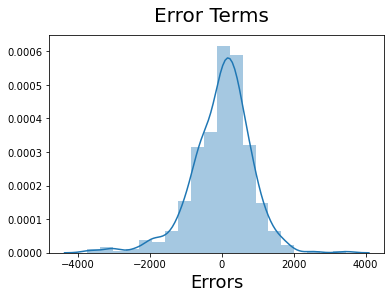

In [92]:
# Plot the histogram of the error terms to check if residuals are normally distributed
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

plt.show()

#### Inference:
Errors are normally distribured here with mean 0. So everything seems to be fine

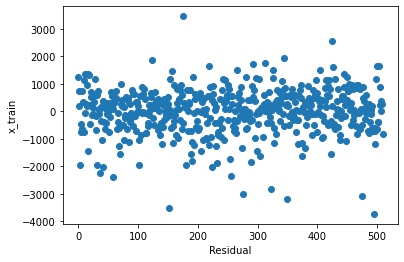

In [108]:
# Scatter plot to check for independence of residuals
plt.scatter(c,residual)
plt.ylabel("x_train")
plt.xlabel("Residual")
plt.show()

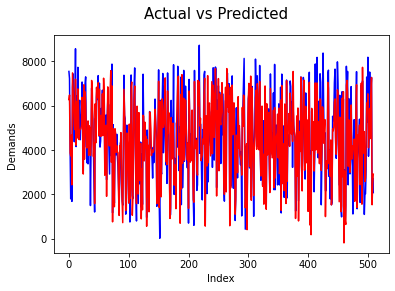

In [102]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue",linewidth=1.5, linestyle="-")
plt.plot(c,y_train_pred, color="red",linewidth=1.5, linestyle="-")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Inference: 
Actual and Predicted result following almost the same pattern so this model seems ok

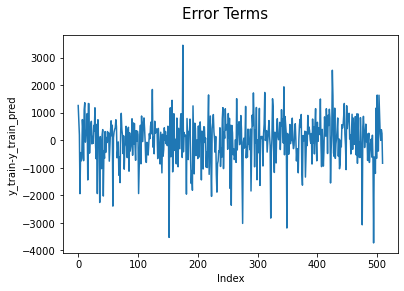

In [104]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,residual,linewidth=1.5, linestyle="-")
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Inference: 
Here,If we see the error terms are independent of each other.

In [72]:
#Print R-squared Value
r2_score(y_train,y_train_pred)


0.8175526872851987

#### Inference:
R2 Same as we obtained for our final model

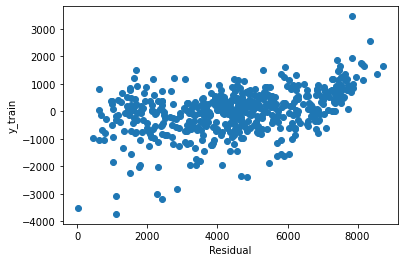

In [105]:
# Scatter plot to check for independence of residuals
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3. Predict values for test data set

In [74]:
# Create list of numeric variables
num_vars = ['temp','atemp','hum','windspeed']

#Fit and transform training set only
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [75]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,0.837241,0.778767,0.534223,0.149393,6043,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,6211,0,1,...,0,0,0,0,1,0,0,0,1,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,2659,0,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,4780,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,4968,0,1,...,0,0,1,0,0,0,0,0,1,0


In [76]:
#y to contain only target variable
y_test=df_test.pop('cnt')

#X is all remainign variable also our independent variables
X_test=df_test

In [77]:
# Add a constant
X_test_sm = sm.add_constant(X_test[cols]) 

# Create a first fitted model
lm = sm.OLS(y_test, X_test_sm).fit()
print(lm.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     116.9
Date:                Tue, 06 Jul 2021   Prob (F-statistic):           5.19e-73
Time:                        12:52:48   Log-Likelihood:                -1777.8
No. Observations:                 219   AIC:                             3574.
Df Residuals:                     210   BIC:                             3604.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2152.6322    

In [78]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul','season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_test[cols],y_test)
print(lr.intercept_,lr.coef_)

2152.632153126167 [ 2097.94079059 -1312.77335402  -416.11219502   495.08819449
   305.05061386 -2148.20616609  -566.41423705  3415.65896223]


In [79]:
#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 7.4. R-Squared value for test prediction

In [80]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8165630595769047

#### Inference
R2 value for predictions on test data (0.8165) is almost same as R2 value of train data(0.8175). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)


### 8. Model Evaluation

Text(0, 0.5, 'y_pred')

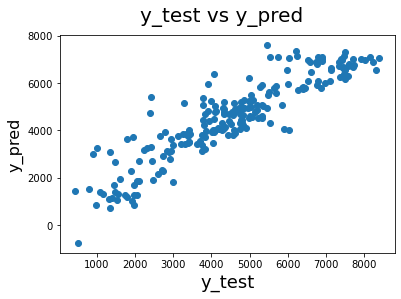

In [81]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

#### Inference
We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.


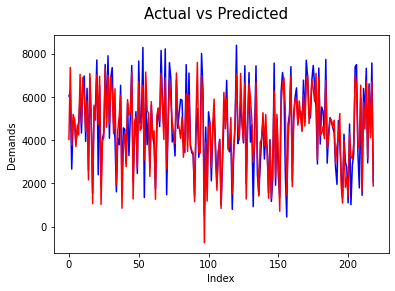

In [82]:
# Actual vs Predicted
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test, color="blue")
plt.plot(c,y_test_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

****
Inference
As we can see predictions for test data is very close to actuals
****

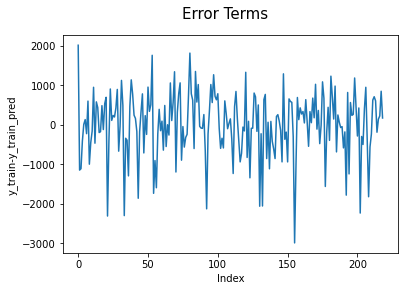

In [83]:
# Error Terms
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test-y_test_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

****
Inference
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.
****

## 9. Model Prediction

### 9.1. Checking Data

In [84]:
# Checking data before building Final model
Bike_Sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


### 9.2. Final Model

In [85]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept','weathersit_bad', 'weathersit_moderate', 'temp']

lm=build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     280.6
Date:                Tue, 06 Jul 2021   Prob (F-statistic):          1.21e-179
Time:                        12:52:53   Log-Likelihood:                -4153.4
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     501   BIC:                             8363.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1686.3236    

## 10. Interpretation of Results

### 10.1 Analysis from the above model

* Company should focus on expanding business during Spring.
* Company should focus on expanding business during September.
* Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to   2019.
* There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having   business impact.
****

### 10.2 Varibles in Predicting the demand

* holiday
* temp
* hum
* windspeed
* Season
* months(January, July, September, November, December)
* Year (2019)
* Sunday
* weathersit( Light Snow, Mist + Cloudy)

* Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little for September as this is when business would be at its best